## Random forest con scikit-lear

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el dataset a utilizar
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', sep=',')

### Exploración de datos.

In [3]:
# Visualización del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
634,13,104,72,0,0,31.2,0.465,38,1
90,4,123,80,15,176,32.0,0.443,34,0
412,1,143,74,22,61,26.2,0.256,21,0
591,3,132,80,0,0,34.4,0.402,44,1
342,5,122,86,0,0,34.7,0.290,33,0
343,8,95,72,0,0,36.8,0.485,57,0
510,0,139,62,17,210,22.1,0.207,21,0
514,3,163,70,18,105,31.6,0.268,28,1
751,3,108,62,24,0,26.0,0.223,25,0
441,4,117,64,27,120,33.2,0.230,24,0


In [4]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 
                       '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', 
                       '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', 
                       '9. Class variable (0 or 1)']

In [5]:
# Verificación d datos.
df_diabetes.head() 

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
print(df_diabetes.shape)

(767, 9)


8 Caracteristicas de entrada y 1 caracteristica de salida/Destino/Target.
    - Número de embarazos.
    - Concentración de glucsa e plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
    - Presión arterial 
    - Espesor del pliegue cutaneo
    - Insulina serica
    - Indice de masa corporal
    - Función del pedigrí de la diabetes.
    - Edad
    - Variedad de clase.

In [7]:
# Analizamos el shape del objeto.
df_diabetes.shape

(767, 9)

In [8]:
# Visualizamos los tipos de datos.
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

### Entrenamiento de random forest con scikit-learn

In [9]:
# Separamos X e y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis =1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [10]:
# Importamos las librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# 30% Para el test y 70% para el train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [12]:
# Arbol de decision
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 00000)

In [13]:
# Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [14]:
# Calculo de las predicciones en Train y Test.
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Evaluación del modelo

In [15]:
# Calculo de metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.9850746268656716
El accuracy en test es:  0.7445887445887446


In [17]:
# Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

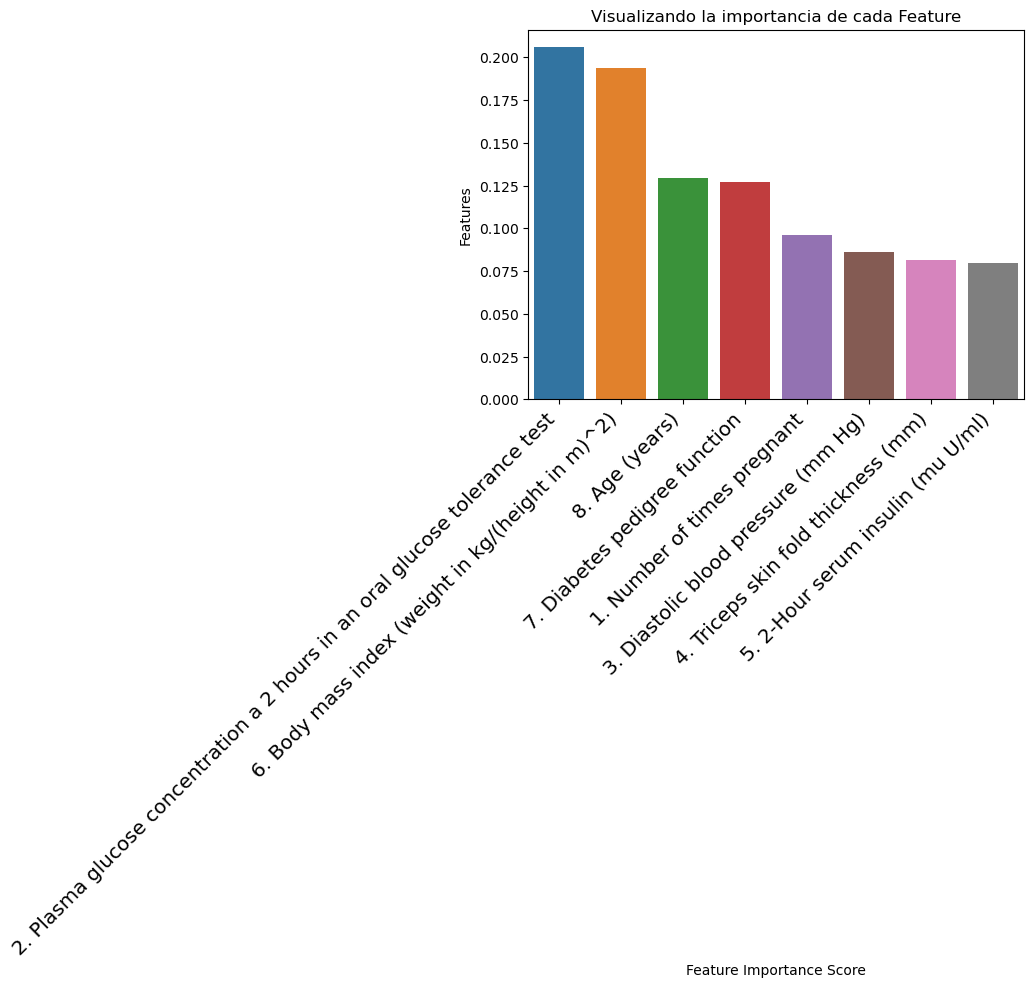

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = feature_importances_df.feature, y = feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")